In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split  # Eksik import eklendi
from sklearn.metrics import classification_report, accuracy_score
import shutil


In [ ]:
from google.colab import drive

# Google Drive bağlantısı
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri seti klasörü
data_dir = "/content/drive/MyDrive/dataset/bloodcells_dataset"
train_dir = "dataset/train"
test_dir = "dataset/test"

# Eğitim ve test verilerini ayırma
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Mevcut verileri uygun şekilde bölme
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        train_category_path = os.path.join(train_dir, category)
        test_category_path = os.path.join(test_dir, category)
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_category_path, img))
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_category_path, img))



In [ ]:
# Veri artırma (Data Augmentation)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Veri yükleme
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(180, 180), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(180, 180), batch_size=32, class_mode='categorical', shuffle=False)


Found 13671 images belonging to 8 classes.
Found 3421 images belonging to 8 classes.


In [ ]:
# Modelin oluşturulması
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Modelin eğitilmesi
epochs = 50
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 138s 308ms/step - accuracy: 0.3002 - loss: 1.8480 - val_accuracy: 0.4768 - val_loss: 1.2754
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.4333 - loss: 1.4386 - val_accuracy: 0.4645 - val_loss: 1.3259
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 128s 300ms/step - accuracy: 0.5254 - loss: 1.2135 - val_accuracy: 0.6934 - val_loss: 0.7213
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.6630 - loss: 0.8884 - val_accuracy: 0.8004 - val_loss: 0.5605
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 128s 299ms/step - accuracy: 0.7226 - loss: 0.7292 - val_accuracy: 0.7296 - val_loss: 0.6518
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.7618 - loss: 0.6571 - val_accuracy: 0.8275 - val_loss: 0.4689
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 128s 299ms/step - accuracy: 0.7794 - loss: 0.6083 - val_accuracy: 0.8667 - val_loss: 0.3960
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 127s 297ms/step - accuracy: 0.7918 -

In [ ]:
# Modelin değerlendirilmesi
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step
Accuracy: 0.9523531131248173
              precision    recall  f1-score   support

    basophil       0.93      0.99      0.96       244
  eosinophil       0.99      1.00      1.00       624
erythroblast       0.98      0.93      0.95       311
          ig       0.92      0.90      0.91       579
  lymphocyte       0.99      0.91      0.95       243
    monocyte       0.91      0.88      0.90       284
  neutrophil       0.91      0.98      0.94       666
    platelet       1.00      0.98      0.99       470

    accuracy                           0.95      3421
   macro avg       0.95      0.95      0.95      3421
weighted avg       0.95      0.95      0.95      3421



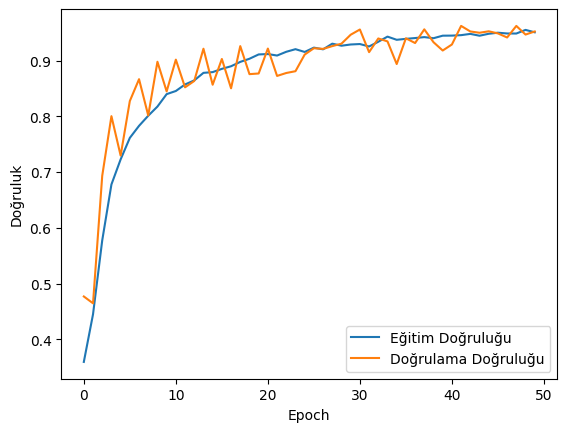

In [ ]:
# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [ ]:
# Modeli kaydetme
model.save("cancer_detection_model.h5")

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Modeli yükle
model = load_model("/content/cancer_detection_model.h5")  # Model dosyanın yolunu güncelle

# Görseli yükleme ve işleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Görüntüyü oku
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB formatına çevir
    image = cv2.resize(image, (180, 180))  # Modelin giriş boyutuna göre yeniden boyutlandır
    image = image / 255.0  # Normalizasyon
    image = np.expand_dims(image, axis=0)  # Batch boyutunu ekle
    return image

# Test edilen görüntünün yolu
test_image_path = "/content/drive/MyDrive/dataset/bloodcells_dataset/ig/IG_132866.jpg"  # Test etmek istediğin görüntünün yolunu güncelle

In [ ]:
# Görseli işle
processed_image = preprocess_image(test_image_path)

# Tahmin yap
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)  # En yüksek olasılığa sahip sınıfı bul

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


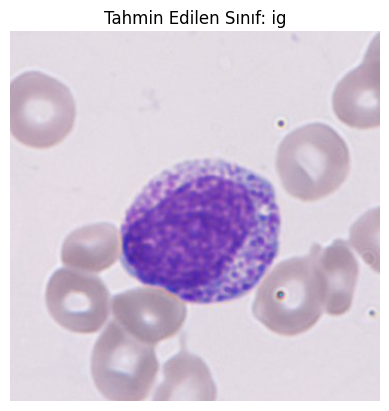

In [ ]:
# Sınıf isimleri (Modelin çıktısına uygun şekilde güncelle)
class_labels = ["basophil", "eosinophil","erythroblast", "ig", "lymphocyte", "monocyte", "neutrophil", "platelet"]  # Kendi sınıf isimlerinle değiştir

# Görseli göster
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.title(f"Tahmin Edilen Sınıf: {class_labels[predicted_class]}")
plt.show()
